<a href="https://colab.research.google.com/github/BrilliantChard/100-days-of-tensorflow/blob/main/Image_Classification_Simplilearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
print("Happy Coding!")

Happy Coding!


In [26]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [28]:
y_train.shape

(50000, 1)

In [29]:
x_test.shape

(10000, 32, 32, 3)

In [30]:
y_test.shape

(10000, 1)

In [31]:
x_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [32]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [33]:
y_test = y_test.reshape(-1, )

In [34]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [35]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [42]:
def plot_sample(x, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

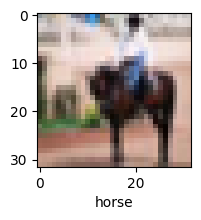

In [45]:
plot_sample(x_train, y_train, 11)

# Normalizing

In [46]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [51]:
x_train.shape

(50000, 32, 32, 3)

In [52]:
x_test.shape

(10000, 32, 32, 3)

# Creating Artifcial Neural Network (ANN)

In [53]:
x_train.shape

(50000, 32, 32, 3)

Adding Layers

In [55]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling the Model

In [57]:
ann.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Fitting / Running the model

In [58]:
ann.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 122ms/step - accuracy: 0.1020 - loss: 2.4142
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 193s 116ms/step - accuracy: 0.0975 - loss: 2.3028
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 115ms/step - accuracy: 0.1004 - loss: 2.3027
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 206s 118ms/step - accuracy: 0.0980 - loss: 2.3027
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 122ms/step - accuracy: 0.0990 - loss: 2.3028
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 211s 135ms/step - accuracy: 0.0981 - loss: 2.3028
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 278s 145ms/step - accuracy: 0.0995 - loss: 2.3028
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 207s 110ms/step - accuracy: 0.0987 - loss: 2.3028
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 108ms/step - accuracy: 0.1005 - loss: 2.3027
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 209s 113ms/step - accuracy: 0.1008 - loss: 2.3028


In [60]:
from sklearn.metrics import classification_report

y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(f"Classification report: \n{classification_report(y_test, y_pred_classes)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.10      1.00      0.18      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


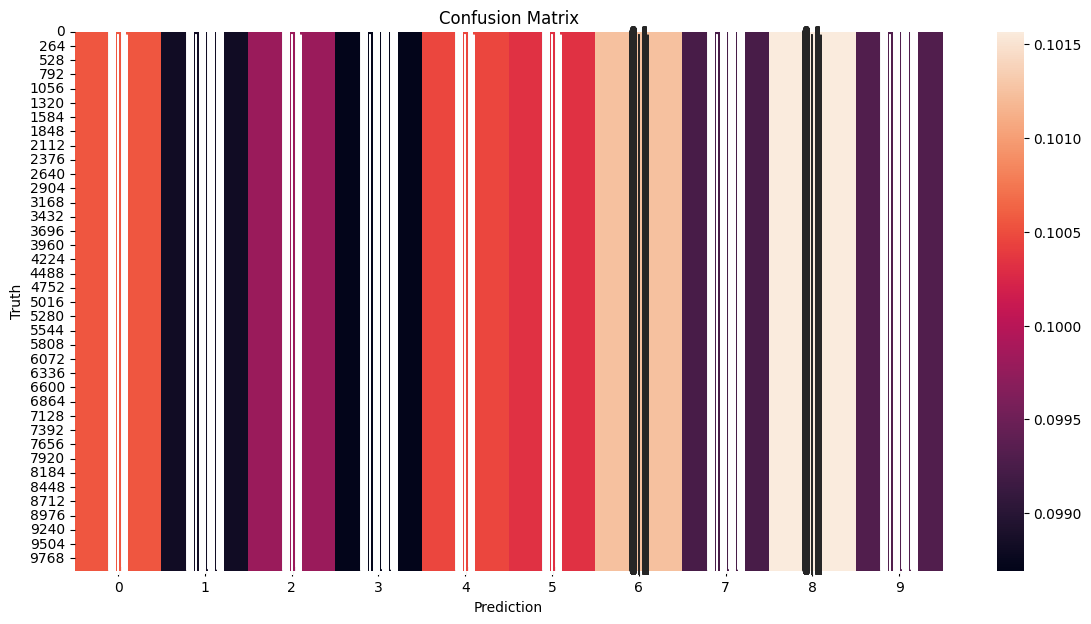

In [61]:
plt.figure(figsize=(14, 7))
sns.heatmap(y_pred, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show()

# Creating Convolution Neural Networks (CNN)

In [63]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
cnn = models.Sequential([])